In [1]:
A0 = 1.0
A1 = 1.0e-9
A2 = 1.0e-9
A3 = 1.0e-9
sigma = 1

inputfile='blank_bkg.fits'
#inputfile='bck_filled.fits'

# Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

from astropy.io import fits
from astropy import table

import random

In [3]:
file=fits.open(inputfile)

In [4]:
#file.info()
#print(file[0].data)

## Value distribution

In [5]:
l = len(file[0].data)
mu = A0

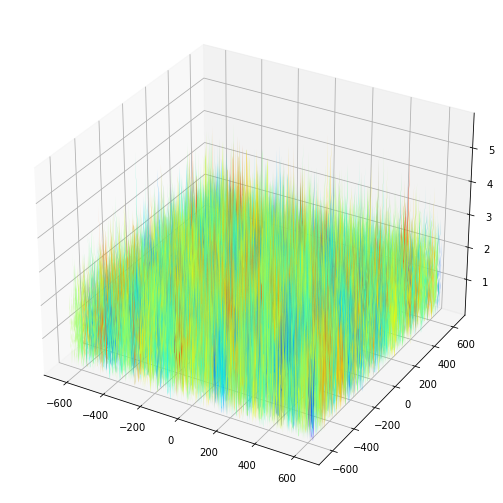

[[0.86294711 0.07330305 2.20346826 ... 0.62096566 1.72413489 0.86966092]
 [1.65900798 1.05519706 0.63932826 ... 0.63226941 0.04637733 0.19882361]
 [0.01507115 2.01311434 0.50483181 ... 1.86479183 0.12061081 0.24344027]
 ...
 [0.88493737 0.93546227 0.97577161 ... 0.10682674 1.02801414 1.63691573]
 [1.11284424 2.4161347  0.06722647 ... 3.37358592 0.94785319 0.6991102 ]
 [1.76991637 1.30423971 0.52434977 ... 0.41590053 0.92476354 0.1909054 ]]


In [6]:
x=np.linspace(-l/2,l/2, num=l)
y=np.linspace(-l/2,l/2, num=l)

x, y = np.meshgrid(x, y)

z = np.random.normal(mu, sigma, (l, l))
z = np.abs(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap=cm.jet)
plt.show()

print(z)

## Multipli

In [7]:
#se parti da un file diverso da blank_bkg usa questo e commenta la riga con *=z
#z = file[0].data[:][:]*A0

file[0].data[:][:] = z*A0

print(file[0].data)
file.writeto('fake_sky_bkg.fits', overwrite=True)

#######################################################################################

file[0].data[:][:] = z*A0

file[0].data[:][:] *= A1
print(file[0].data)
file.writeto('sky_norm1.fits', overwrite=True)

#######################################################################################

file[0].data[:][:] = z*A0

file[0].data[:][:] *= A2
print(file[0].data)
file.writeto('sky_norm2.fits', overwrite=True)

#######################################################################################

file[0].data[:][:] = z*A0

file[0].data[:][:] *= A3
print(file[0].data)
file.writeto('sky_norm3.fits', overwrite=True)

[[0.8629471  0.07330305 2.2034683  ... 0.62096566 1.7241349  0.8696609 ]
 [1.659008   1.055197   0.63932824 ... 0.6322694  0.04637733 0.19882362]
 [0.01507115 2.0131145  0.5048318  ... 1.8647919  0.1206108  0.24344027]
 ...
 [0.88493735 0.93546224 0.9757716  ... 0.10682674 1.0280142  1.6369157 ]
 [1.1128442  2.4161346  0.06722647 ... 3.373586   0.9478532  0.6991102 ]
 [1.7699164  1.3042397  0.52434975 ... 0.41590053 0.92476356 0.1909054 ]]
[[8.62947103e-10 7.33030511e-11 2.20346830e-09 ... 6.20965668e-10
  1.72413483e-09 8.69660899e-10]
 [1.65900793e-09 1.05519693e-09 6.39328201e-10 ... 6.32269348e-10
  4.63773325e-11 1.98823610e-10]
 [1.50711440e-11 2.01311434e-09 5.04831787e-10 ... 1.86479188e-09
  1.20610799e-10 2.43440268e-10]
 ...
 [8.84937346e-10 9.35462263e-10 9.75771575e-10 ... 1.06826735e-10
  1.02801412e-09 1.63691560e-09]
 [1.11284415e-09 2.41613463e-09 6.72264674e-11 ... 3.37358586e-09
  9.47853129e-10 6.99110214e-10]
 [1.76991632e-09 1.30423972e-09 5.24349730e-10 ... 4.159